In [1]:
import sys, os
sys.path.append(os.path.join(os.environ['ATS_SRC_DIR'],'tools','meshing_ats','meshing_ats'))

import meshing_ats

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
#fname = '/Users/ajc/Desktop/ATS/meshes/SubgridModel/watershed/SPRUCE/2cm-resolution/SPRUCE_20_MAY_2017_DEM_2cm.vtk'
#infile = '/Users/ajc/Desktop/ATS/meshes/SubgridModel/watershed/SPRUCE/coarse/spruce-6-may-2017-dem-2cm-coarse.vtk'


infile ="four-polygons/four_polygon-surface.vtk".encode('utf8')
outfile = "/meshes/four-polygons/"
#m2 = meshing_ats.Mesh2D.read_VTK(fname)
m2 =meshing_ats.Mesh2D.read_VTK_Unstructured(infile)


In [ ]:
# Single column
infile= '/Users/ajc/Desktop/ATS/meshes/singlecolumns/column.vtk'
outfile = "/Users/ajc/Desktop/ATS/meshes/singlecolumns/"
m2 =meshing_ats.Mesh2D.read_VTK_Unstructured(infile)


In [ ]:
m2.plot()
plt.show()

def unifrom_laying():
    # layer extrusion
    layer_types = []
    layer_data = []
    layer_ncells = []
    layer_mat_ids = []

    z=0
    Z = []

    for i in range(1):
        layer_types.append('constant')
        layer_data.append(0.02)
        layer_ncells.append(1)
        layer_mat_ids.append(1001)
        z = z + 0.02
        Z.append(z)
    print ('Moss ', z)

    for i in range(4): 
        layer_types.append('constant')
        layer_data.append(0.02)
        layer_ncells.append(1)
        layer_mat_ids.append(1002)
        z = z + 0.02
        Z.append(z)
    print ('Peat ', z)  
    for i in range(15): #8cm peat, n=20, 20cm peat n = 14
        layer_types.append('constant')
        layer_data.append(0.02)
        layer_ncells.append(1)
        layer_mat_ids.append(1003)
        z = z + 0.02
        Z.append(z)
    print ('Upper mineral ', z)


    dz = .02
    for i in range(35):
        dz *= 1.075
        layer_types.append("constant")
        layer_data.append(dz)
        layer_ncells.append(1)
        layer_mat_ids.append(1004)
        z = z + dz
        Z.append(z)
    print ('Ice rich', z)

    for i in range(25):
        dz *= 1.12
        layer_types.append("constant")
        layer_data.append(dz)
        layer_ncells.append(1)
        layer_mat_ids.append(1005)
        z = z + dz
        Z.append(z)
    print (z)


    layer_types.append('snapped')
    layer_data.append(-45.0) # bottom location
    layer_ncells.append(1)
    layer_mat_ids.append(1005)

    #Z = [round(z*1,3) for z in Z]
    #for i in range(len(Z) -1):
    #    print Z[i+1] - Z[i], Z[i]

    print len(Z)

    m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                            layer_data, 
                                            layer_ncells, 
                                            layer_mat_ids)

    m3.write_exodus(outfile + "column-5layers-om10cm.exo")
    #m3.write_exodus(outfile + "fourpolygons-5layers-om10cm.exo")

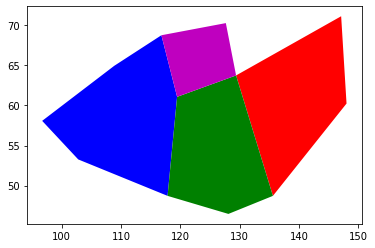

In [5]:
m2.plot(color=['b','r','g','m','c'])
plt.show()

def non_unifrom_laying():
    # layer extrusion
    layer_types = []
    layer_data = []
    layer_ncells = []
    layer_mat_ids = []

    z=0
    Z = []

    for i in range(1):
        layer_types.append('constant')
        layer_data.append(0.02)
        layer_ncells.append(1)
        layer_mat_ids.append(1001)
        z = z + 0.02
        Z.append(z)
    print ('Moss ', z)

    for i in range(4): 
        layer_types.append('constant')
        layer_data.append(0.02)
        layer_ncells.append(1)
        layer_mat_ids.append(1002)
        z = z + 0.02
        Z.append(z)
    print ('Peat ', z)  
    for i in range(15): #8cm peat, n=20, 20cm peat n = 14
        layer_types.append('constant')
        layer_data.append(0.02)
        layer_ncells.append(1)
        layer_mat_ids.append(1003)
        z = z + 0.02
        Z.append(z)
    print ('Upper mineral ', z)


    dz = .02
    for i in range(35):
        dz *= 1.075
        layer_types.append("constant")
        layer_data.append(dz)
        layer_ncells.append(1)
        layer_mat_ids.append(1004)
        z = z + dz
        Z.append(z)
    print ('Ice rich', z)

    for i in range(25):
        dz *= 1.12
        layer_types.append("constant")
        layer_data.append(dz)
        layer_ncells.append(1)
        layer_mat_ids.append(1005)
        z = z + dz
        Z.append(z)
    print (z)


    layer_types.append('snapped')
    layer_data.append(-45.0) # bottom location
    layer_ncells.append(1)
    layer_mat_ids.append(1005)

    #Z = [round(z*1,3) for z in Z]
    #for i in range(len(Z) -1):
    #    print Z[i+1] - Z[i], Z[i]

    print (len(Z))

    m3 = meshing_ats.Mesh3D.extruded_Mesh2D(m2, layer_types, 
                                            layer_data, 
                                            layer_ncells, 
                                            layer_mat_ids)

    m3.write_exodus(outfile + "column-5layers-om10cm.exo")
    #m3.write_exodus(outfile + "fourpolygons-5layers-om10cm.exo")